In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Downloads/winequality-red.csv', header=None)

Note that the data is from the UCI Machine Learning Repository, and this data in particular is red wine. The purpose of this notebook is to explore different visualization and modeling techniques using pandas to get a greater idea of the characteristics of wine. 

In [3]:
df = df.astype(str)

In [4]:
df = df.drop(index=0)

In [5]:
df_split = df.iloc[:, 0].str.split(';', expand=True)

These last three lines serve to clean up the csv file so it is readable. We made it a string so we could use the string split function to get all the data into the desired columns.

In [6]:
df = df_split

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [8]:
df = df.astype(float)

In [ ]:
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Now that the data is in the right format, we change the values back into floats, and name the columns based on the UCI Machine Learning Repository.

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


We can now look at general characteristics of the data, such as the datatypes, dimensions, and baseline statistical data of each column.

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [12]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [13]:
df.shape

(1599, 12)

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6.0        4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6.0        4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7.0        4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5.0        4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5.0        3
                     

In [16]:
df.isna().values.any() #checking for na values

False

In [17]:
import seaborn as sb

Using the seaborn library, we can construct a heatmap to see the correlation between the variables. A correlation of 1 and -1 is strongly positve and negative correlation respectively. Chose the icefire color scheme to clearly tell the difference, and annotated the values as well.

In [18]:
corr = df.corr()

<Axes: >

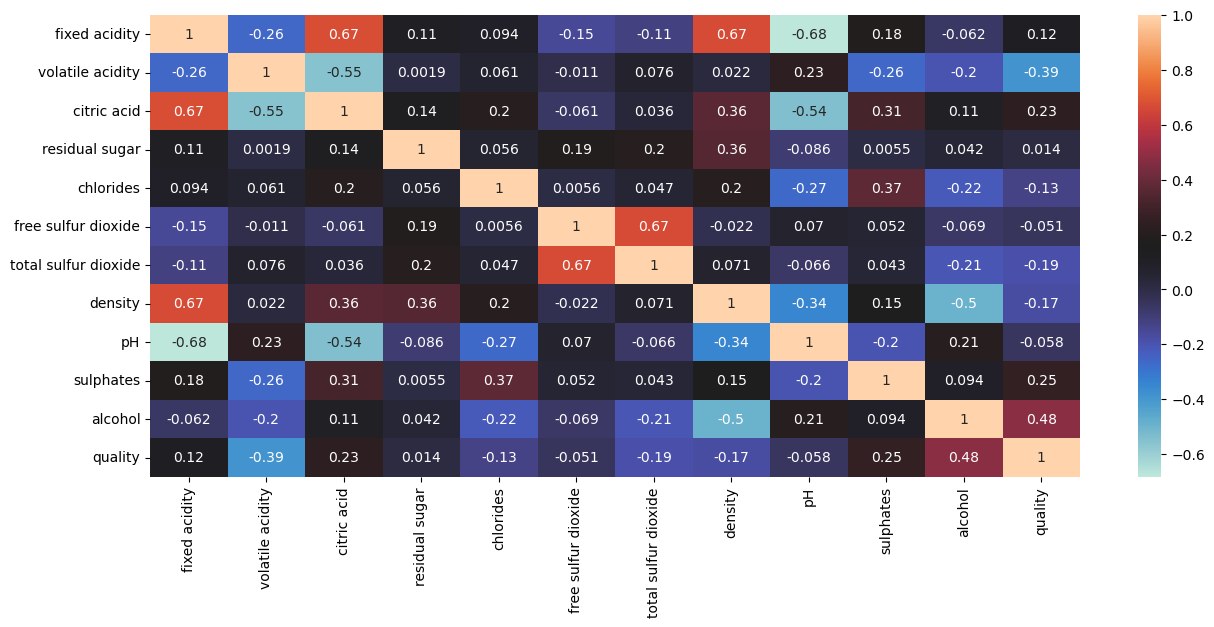

In [49]:
plt.figure(figsize=(15,6))
sb.heatmap(corr, cmap='icefire', annot=True) #making a visual to see the correlations between the variables

<Axes: >

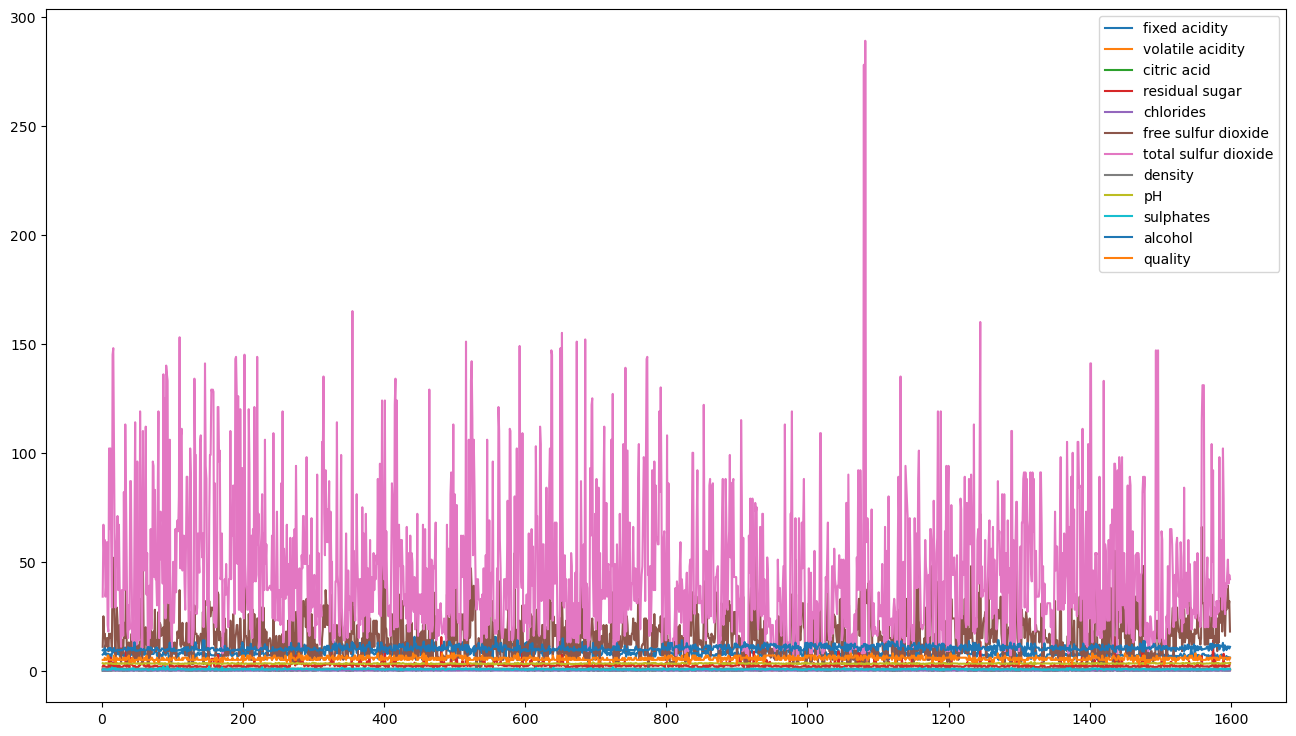

In [20]:
df.plot(figsize=(16,9)) #setting an initial plot, seems like there is an outlier in the free sulfur dioxide
#plotting is generally helpful for finding outliers and missing values in the data.
#this plot in particular is just a bar graph of all column values for each individual wine. However, it is not very readable, we we will be more specific with plots moving forward.

<Axes: ylabel='Frequency'>

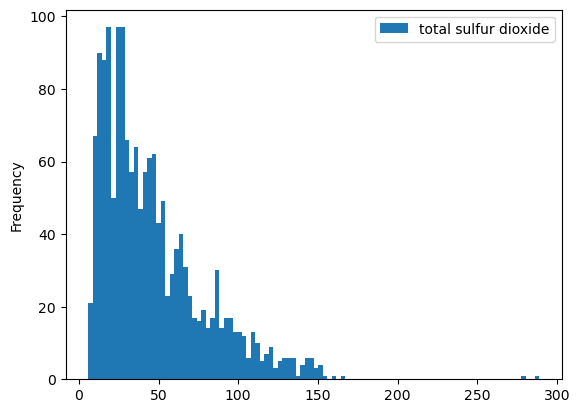

In [21]:
df.plot(kind='hist', y='total sulfur dioxide', bins=100)

In [22]:
# we can see that this is a right skewed distribution.

<Axes: >

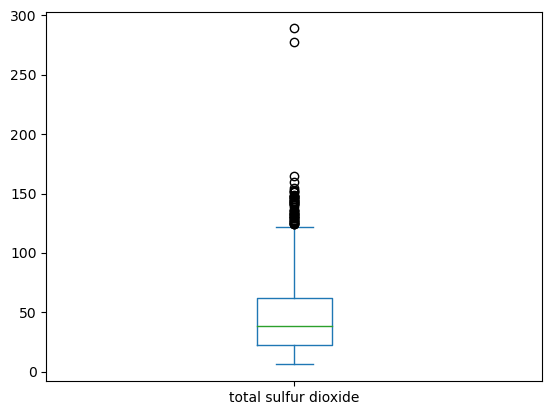

In [23]:
df['total sulfur dioxide'].plot(kind='box') #from this boxplot we can see that there are two big outliers.

In [24]:
df.loc[df['total sulfur dioxide'] > 200] #here we can see the two outliers.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1080,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7.0
1082,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7.0


In [25]:
df.loc[df['total sulfur dioxide'] > 200, 'total sulfur dioxide'] = df['total sulfur dioxide'].mean() #swapping outlier values to the mean of the column.

In [26]:
df.iloc[[1080, 1082], 6]

1081     8.0
1083    70.0
Name: total sulfur dioxide, dtype: float64

<Axes: >

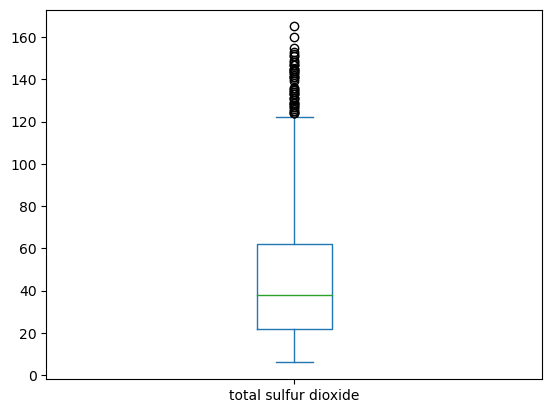

In [27]:
df['total sulfur dioxide'].plot(kind='box') # the outliers have been removed!

In [28]:
#an alternative could just be to drop the outlier since we have so much data.

df.drop(df[df['total sulfur dioxide'] > 200].index, inplace=True)

In [29]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


C:\Users\Trey\AppData\Local\Temp\ipykernel_10684\1797030829.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['total sulfur dioxide'], ax=ax)


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

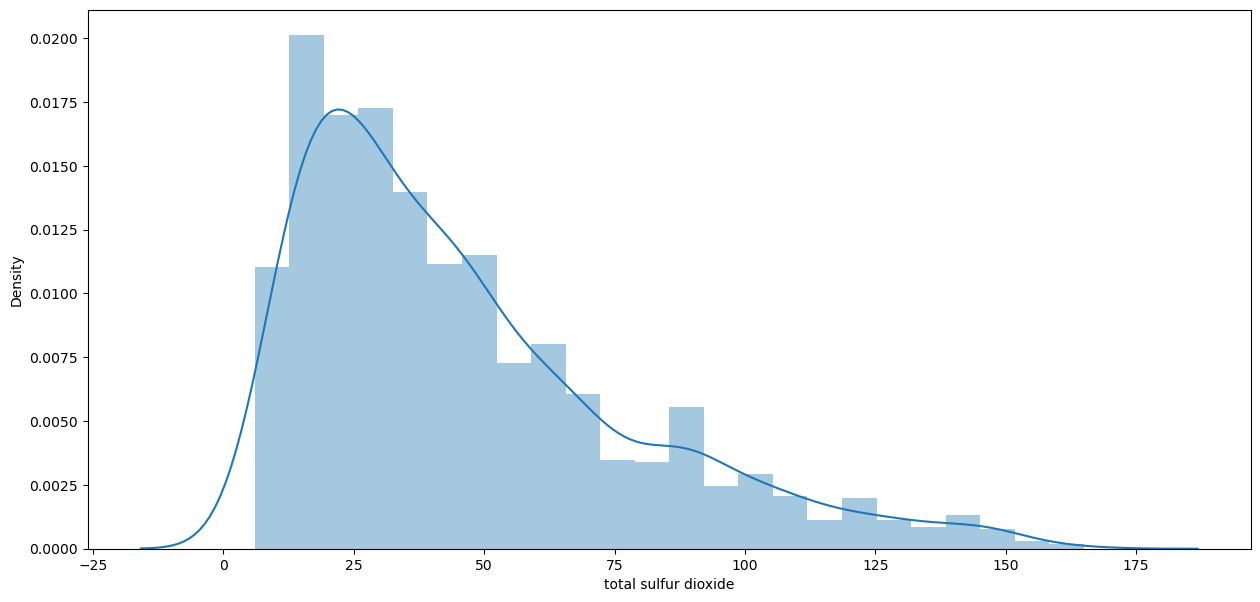

In [30]:
#statistical analysis

#distance plot using seaborn, generates a KDE, histogram, and a rugplot

fig, ax = plt.subplots(figsize=(15, 7))
sb.distplot(df['total sulfur dioxide'], ax=ax)

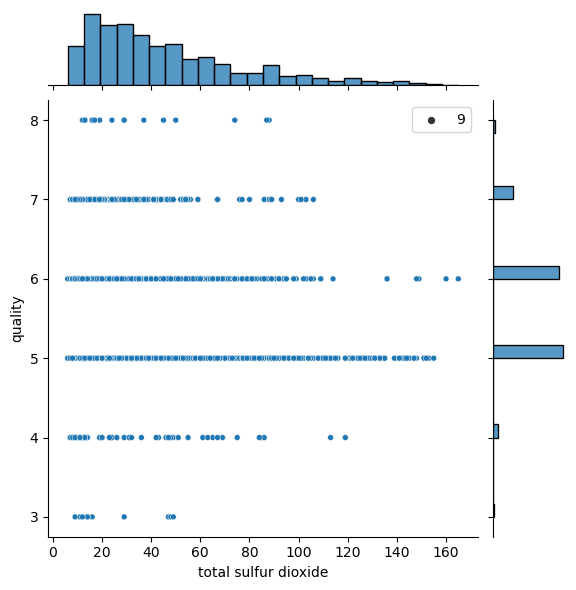

In [31]:
sb.jointplot(x="total sulfur dioxide", y="quality", data=df, size=9)

#this can show you a lot of different plots at once

In [32]:
#how many wines had a total sulfur dioxide above 100?

(df['total sulfur dioxide'] > 100).sum()

125

C:\Users\Trey\AppData\Local\Temp\ipykernel_10684\1722436878.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['total sulfur dioxide'], ax=ax, bins=50,


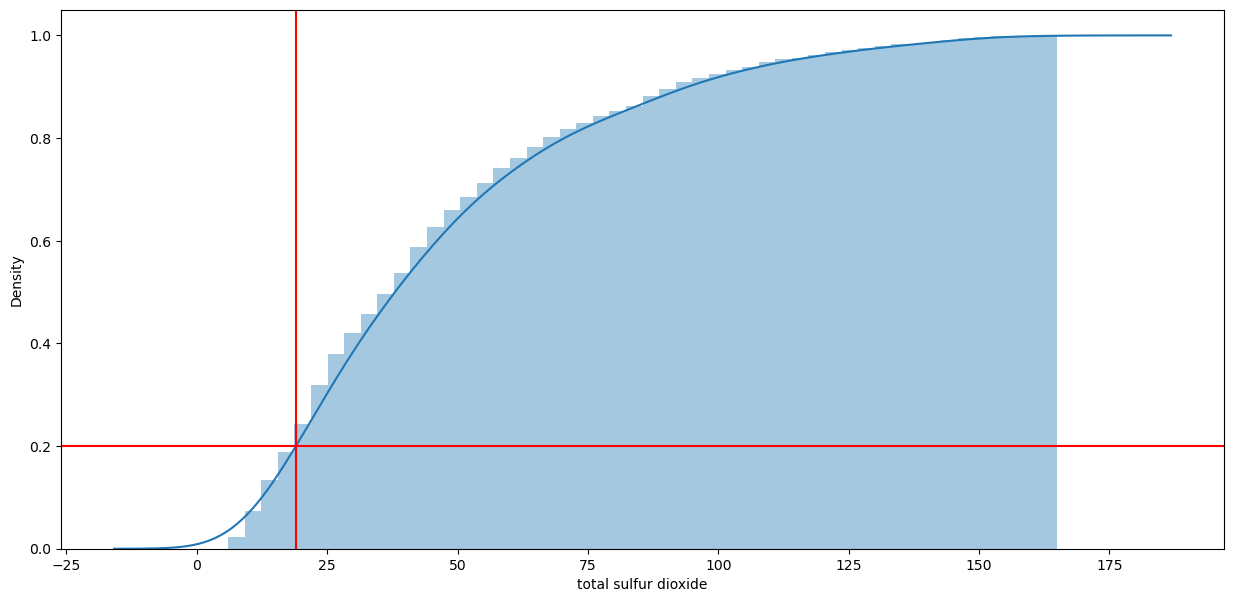

In [33]:
#cumulative plot

fig, ax = plt.subplots(figsize=(15, 7))
sb.distplot(df['total sulfur dioxide'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df['total sulfur dioxide'].quantile(.2), color='red')

In [34]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [35]:
#scaling the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [36]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.382786,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.655059,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.246211,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.434910,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.382786,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [37]:
kmeans = KMeans(n_clusters=2, init='k-means++')

kmeans.fit(df_scaled)

C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=2)

In [38]:
kmeans.inertia_

15767.34340514145

In [39]:
thelist = []
for cluster in range(1,30):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    thelist.append(kmeans.inertia_)

C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [40]:
thelist

[19188.000000000007,
 15767.34340514145,
 14009.792703129893,
 12639.694902366668,
 11333.552788067671,
 10564.280919195859,
 9813.151110345902,
 9432.662914280962,
 9066.082816328739,
 8773.690691622169,
 8561.334488769253,
 8271.390771469554,
 8096.642102167735,
 7892.931127389297,
 7728.37398745013,
 7570.2813958759225,
 7366.722720162259,
 7220.581559951888,
 7095.195465837557,
 6974.647061914289,
 6873.22738062376,
 6738.608048905751,
 6604.926784143896,
 6557.560250668362,
 6441.732929221319,
 6375.870062228023,
 6308.4960552382745,
 6185.804576390843,
 6129.472214692762]

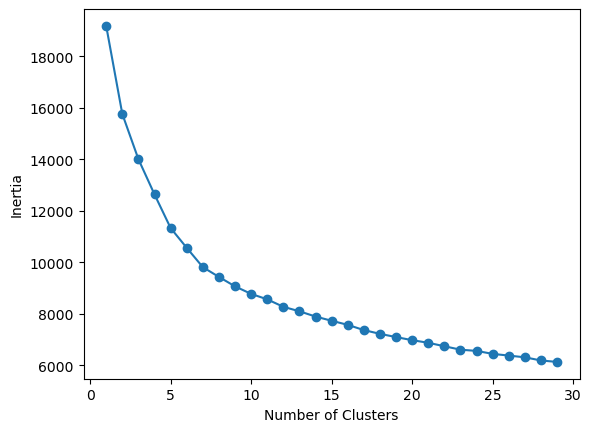

In [41]:
frame = pd.DataFrame({'Cluster': range(1,30), 'thelist': thelist})

plt.figure()

plt.plot(frame['Cluster'], frame['thelist'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [42]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [43]:
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()
#checking to see how many values are in each cluster

4    541
3    358
0    336
2    334
1     30
Name: cluster, dtype: int64

In [44]:
#now we can look at the data and see which cluster each wine is assigned to
frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.382786,0.558274,1.288643,-0.579207,-0.960246,-0.787823,4
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.655059,0.028261,-0.719933,0.128950,-0.584777,-0.787823,4
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.246211,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,4
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.434910,0.664277,-0.979104,-0.461180,-0.584777,0.450848,3
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.382786,0.558274,1.288643,-0.579207,-0.960246,-0.787823,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.068288,-0.978765,0.899886,-0.461180,0.072294,-0.787823,4
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.151861,-0.862162,1.353436,0.601055,0.729364,0.450848,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.194087,-0.533554,0.705508,0.542042,0.541630,0.450848,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.068288,-0.676657,1.677400,0.305990,-0.209308,-0.787823,4


In [45]:
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}

def get_color(cluster_value):
    return color_map.get(cluster_value, 'black')

In [46]:
colors = [get_color(cluster) for cluster in frame['cluster']]

Text(0.5, 1.0, 'Clustered fixed acidity vs. pH')

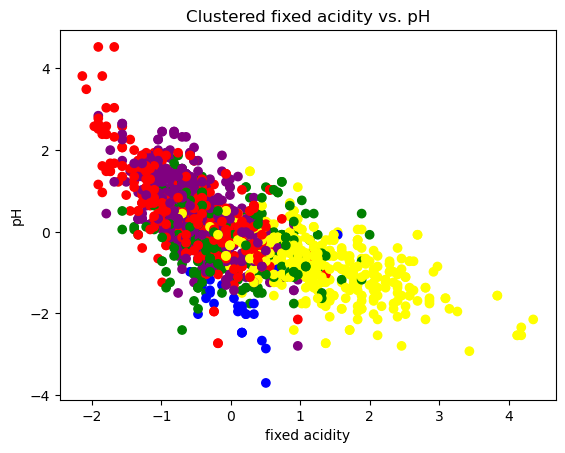

In [50]:
#plotting a graph after assigning a color to each cluster value

plt.scatter(frame['fixed acidity'], frame['pH'], color=colors)
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('Clustered fixed acidity vs. pH')

Here we can see that these two variables are not responsible for the clustering. We would have to find another method of plotting in order to obtain a more valuable visual.

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
frame.columns[1]